<a href="https://colab.research.google.com/github/mmm4707/machine_learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

filepath = '/content/gdrive/My Drive/'

df_data = pd.read_csv(filepath + "BostonHousing.csv")

Mounted at /content/gdrive


In [ ]:
bh_data = np.array(df_data.values, dtype=np.float32)
x_train = np.array(bh_data[:400,:13], dtype=np.float32).reshape(-1, 13)
y_train = np.array(bh_data[:400,13], dtype=np.float32).reshape(-1, 1)
x_test = np.array(bh_data[400:,:13], dtype=np.float32).reshape(-1, 13)
y_test = np.array(bh_data[400:,13], dtype=np.float32).reshape(-1, 1)
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)
print(mu.shape, sigma.shape)
x_train = (x_train - mu) / sigma # toward normal distribution
x_test = (x_test - mu) / sigma # toward normal distribution
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13,) (13,)
(400, 13) (400, 1) (106, 13) (106, 1)


In [ ]:
class Linear:
 def __init__(self, in_features, out_features):
  self.weight = np.random.rand(in_features, out_features) # weight random 초기화
  self.bias = np.random.rand(out_features) # bias random 초기화

  self.grad_w = np.zeros_like(self.weight) # gradients of weight
  self.grad_b = np.zeros_like(self.bias) # gradients of bias
 def forward(self, x):
  self.input_x = x
  x = np.dot(x, self.weight) + self.bias # wx + b
  return x
 def backward(self, grad_output):
  self.grad_w = np.dot(self.input_x.T, grad_output) # weight의 gradient 계산
  self.grad_b = np.sum(grad_output, axis=0) # bias의 gradient 계산
  grad_input = np.dot(grad_output, self.weight.T) # backprogation을 위한 grad input 계산
  return grad_input
 def zero_grad(self):
  self.grad_w.fill(0.)
  self.grad_b.fill(0.)

In [ ]:
class Sigmoid:
    def forward(self, x):
        # Sigmoid 함수의 forward 계산
        self.input = x
        sigmoid_x = 1.0 / (1.0 + np.exp(-x))
        return sigmoid_x

    def backward(self, grad_output):
        # Sigmoid 함수의 backward 계산
        sigmoid_x = self.forward(self.input)
        grad_input = grad_output * sigmoid_x * (1 - sigmoid_x)
        return grad_input


In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.layer1 = Linear(input_size, hidden_size1)
        self.sigmoid1 = Sigmoid()
        self.layer2 = Linear(hidden_size1, hidden_size2)
        self.sigmoid2 = Sigmoid()
        self.layer3 = Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.sigmoid1.forward(x)
        x = self.layer2.forward(x)
        x = self.sigmoid2.forward(x)
        x = self.layer3.forward(x)
        return x

    def backward(self, y_true, y_pred):
        grad_output = (y_pred - y_true) / len(y_true)
        grad_output = self.layer3.backward(grad_output)
        grad_output = self.sigmoid2.backward(grad_output)
        grad_output = self.layer2.backward(grad_output)
        grad_output = self.sigmoid1.backward(grad_output)
        _ = self.layer1.backward(grad_output)

    def zero_grad(self):
        self.layer1.zero_grad()
        self.layer2.zero_grad()
        self.layer3.zero_grad()

In [ ]:
# Stochastic Gradient Descent (경사하강법)
class SGD:
 def __init__(self, params, lr):
  self.params = params
  self.lr = lr
 def step(self):
  for param in self.params:
    param.weight = param.weight - self.lr * param.grad_w
    param.bias = param.bias - self.lr * param.grad_b

In [ ]:
# Loss Function
def MSELoss(h, y):
 err = (h - y) ** 2
 return np.mean(err)

In [ ]:
model = MLP(input_size=13, hidden_size1=16, hidden_size2=8, output_size=1)
opti = SGD([model.layer1, model.layer2, model.layer3], lr=0.01)

epoch = 1000

losses = []
for i in range(epoch):
    y_pred = model.forward(x_train)
    loss = MSELoss(y_pred, y_train)
    losses.append(loss)

    model.zero_grad()
    model.backward(y_train, y_pred)
    opti.step()

losses = np.array(losses)

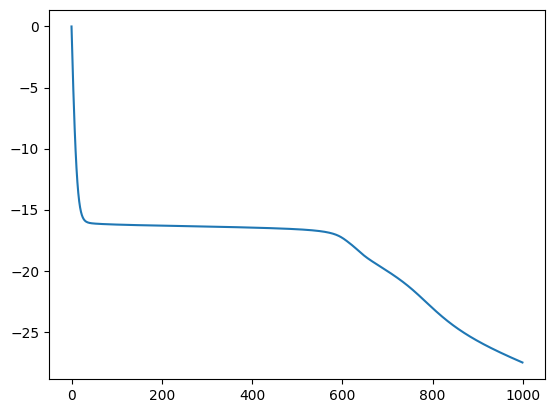

In [ ]:
plt.plot(10.0 * np.log(losses / (np.max(losses + 1e-5))))
plt.show()

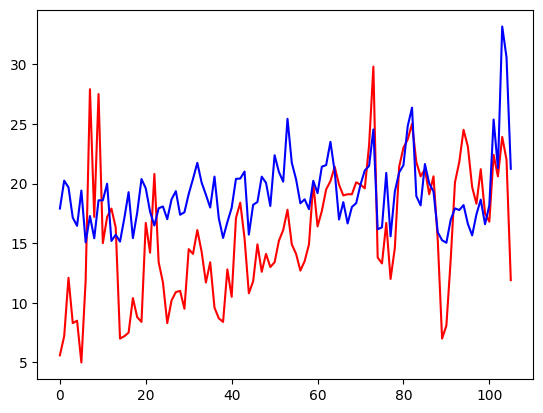

In [ ]:
y_pred = model.forward(x_test)
plt.plot(y_test.reshape(-1,), color="red")
plt.plot(y_pred, color="blue")
plt.show()